In [3]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ports_data.csv')
df.tail()

,Facility Name,Code,Country,Latitude,Longitude,Type
34,Helsinki-Vantaa Airport,HEL,Finland,60.3172,24.9633,Airport
35,Helsinki Vuosaari Harbour Railway Yard,NaN,Finland,60.2060,25.1556,Rail Terminal
36,Port of Piraeus,NaN,Greece,37.9500,23.6300,Seaport
37,Athens International Airport,ATH,Greece,37.9364,23.9445,Airport
38,Thriasio Freight Center,NaN,Greece,38.0666,23.5333,Rail Terminal


In [7]:
source = "Mundra Port"
target = "Athens International Airport"

[('Mundra Port', 'Athens International Airport')]


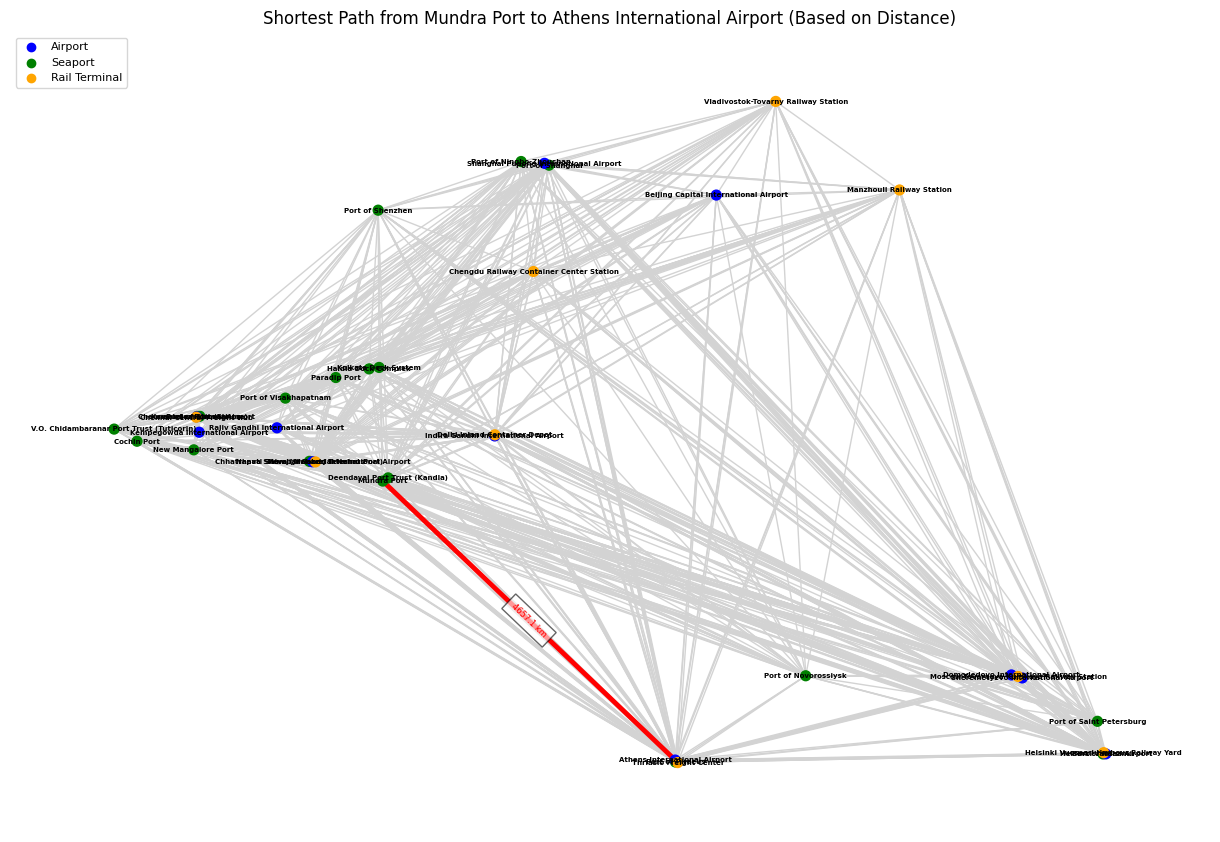

Shortest Path: Mundra Port → Athens International Airport


In [9]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors[row["Type"]])  # Assign color based on type

# Calculate distances and add weighted edges dynamically
threshold_distance = 5000  # Max distance (in km) to connect facilities

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            # if dist <= threshold_distance:
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1))

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Choose source and target nodes

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    print(shortest_edges)
    
    # Get edge weights for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km" for u, v in shortest_edges}

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    print("Shortest Path:", " → ".join(shortest_path))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")
